# Programming Assignment 1
* CSCI-4930/5930 ML Spring 2019
* Author: Jahnavi Srinivasan

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

np.random.seed(45) 

### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
#bring in the six packs
inputData = pd.read_csv('baby-weights-dataset.csv')
print (inputData.columns, inputData.shape, len(inputData.columns))

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'BWEIGHT'],
      dtype='object') (101400, 37) 37


### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
inputData['BWEIGHT'].describe()

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


C:\Users\Jahnasri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


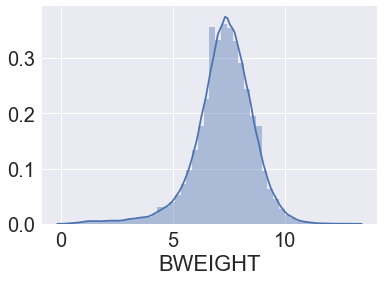

In [299]:
sns.distplot(inputData['BWEIGHT']);

### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [300]:
#skewness and kurtosis
print("Skewness: %f" % inputData['BWEIGHT'].skew())
print("Kurtosis: %f" % inputData['BWEIGHT'].kurt())
print("\nGiven data is Moderately skewed and Platykurtic (lack of outliers)")

Skewness: -0.936593
Kurtosis: 2.868780

Given data is Moderately skewed and Platykurtic (lack of outliers)


### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [301]:
print(inputData.head())

     ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  \
0  2001    2        1    33      26      10    34     12      4       2   
1  2002    2        2    19      40      10    18     11     12       1   
2  2003    2        1    33      16      14    31     16     16       2   
3  2004    1        1    25      40      15    28     12     12       3   
4  2005    1        2    21      60      13    20     12     14       2   

    ...     HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM RENAL RHSEN  \
0   ...           0        0       0       0        0        0     0     0   
1   ...           0        0       0       0        0        0     0     0   
2   ...           0        0       0       0        0        0     0     0   
3   ...           0        0       0       0        0        0     0     0   
4   ...           0        1       0       0        0        0     0     0   

   UTERINE  BWEIGHT  
0        0   4.3750  
1        0   6.9375  
2        0   8

In [4]:
inputData.drop('ID', axis=1, inplace=True)

print(inputData.shape)
indexNames = inputData[ inputData['SEX'] == 9 ].index
 
# Delete these row indexes from dataFrame
inputData.drop(indexNames , inplace=True)
print(inputData.shape)

(101400, 36)
(101399, 36)


In [303]:
print(inputData.head())

inputData = pd.get_dummies(inputData, columns=['HISPMOM', 'HISPDAD', 'RACEDAD', 'RACEMOM', 'SEX', 'MARITAL'], 
                           prefix = ['HISPMOM', 'HISPDAD', 'RACEDAD', 'RACEMOM', 'SEX', 'MARITAL'])
inputData.drop('RACEDAD_0', axis=1, inplace=True)
inputData.drop('RACEMOM_0', axis=1, inplace=True)
inputData.drop('SEX_1', axis=1, inplace=True)
inputData.drop('MARITAL_1', axis=1, inplace=True)

print(inputData.head())

   SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  BDEAD  \
0    2        1    33      26      10    34     12      4       2      0   
1    2        2    19      40      10    18     11     12       1      0   
2    2        1    33      16      14    31     16     16       2      0   
3    1        1    25      40      15    28     12     12       3      0   
4    1        2    21      60      13    20     12     14       2      0   

    ...     HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT PRETERM RENAL  RHSEN  \
0   ...           0        0       0       0        0       0     0      0   
1   ...           0        0       0       0        0       0     0      0   
2   ...           0        0       0       0        0       0     0      0   
3   ...           0        0       0       0        0       0     0      0   
4   ...           0        1       0       0        0       0     0      0   

   UTERINE  BWEIGHT  
0        0   4.3750  
1        0   6.9375  
2       

### TASK 6: Do variable selection from the pool of 36 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

In [304]:
k = 7 #number of variables for heatmap
corrmat = inputData.corr()
cols = corrmat.nlargest(k, 'BWEIGHT')['BWEIGHT']

sm_cols = corrmat.nsmallest(k, 'BWEIGHT')['BWEIGHT']
print(cols)
print(sm_cols)

BWEIGHT      1.000000
WEEKS        0.565335
GAINED       0.173249
RACEMOM_1    0.157066
RACEDAD_1    0.150841
VISITS       0.129548
MAGE         0.068451
Name: BWEIGHT, dtype: float64
RACEMOM_2   -0.151643
RACEDAD_2   -0.141757
HYPERPR     -0.108551
MARITAL_2   -0.107127
SEX_2       -0.093156
CIGNUM      -0.090679
PRETERM     -0.072937
Name: BWEIGHT, dtype: float64


WEEKS        0.565335
GAINED       0.173249
RACEMOM_1    0.157066
RACEDAD_1    0.150841
VISITS       0.129548
MAGE         0.068451
PINFANT      0.067074
Name: BWEIGHT, dtype: float64
RACEMOM_2   -0.151643
RACEDAD_2   -0.141757
HYPERPR     -0.108551
MARITAL_2   -0.107127
SEX_2       -0.093156
CIGNUM      -0.090679
PRETERM     -0.072937
Name: BWEIGHT, dtype: float64
Plot for postive correlation 


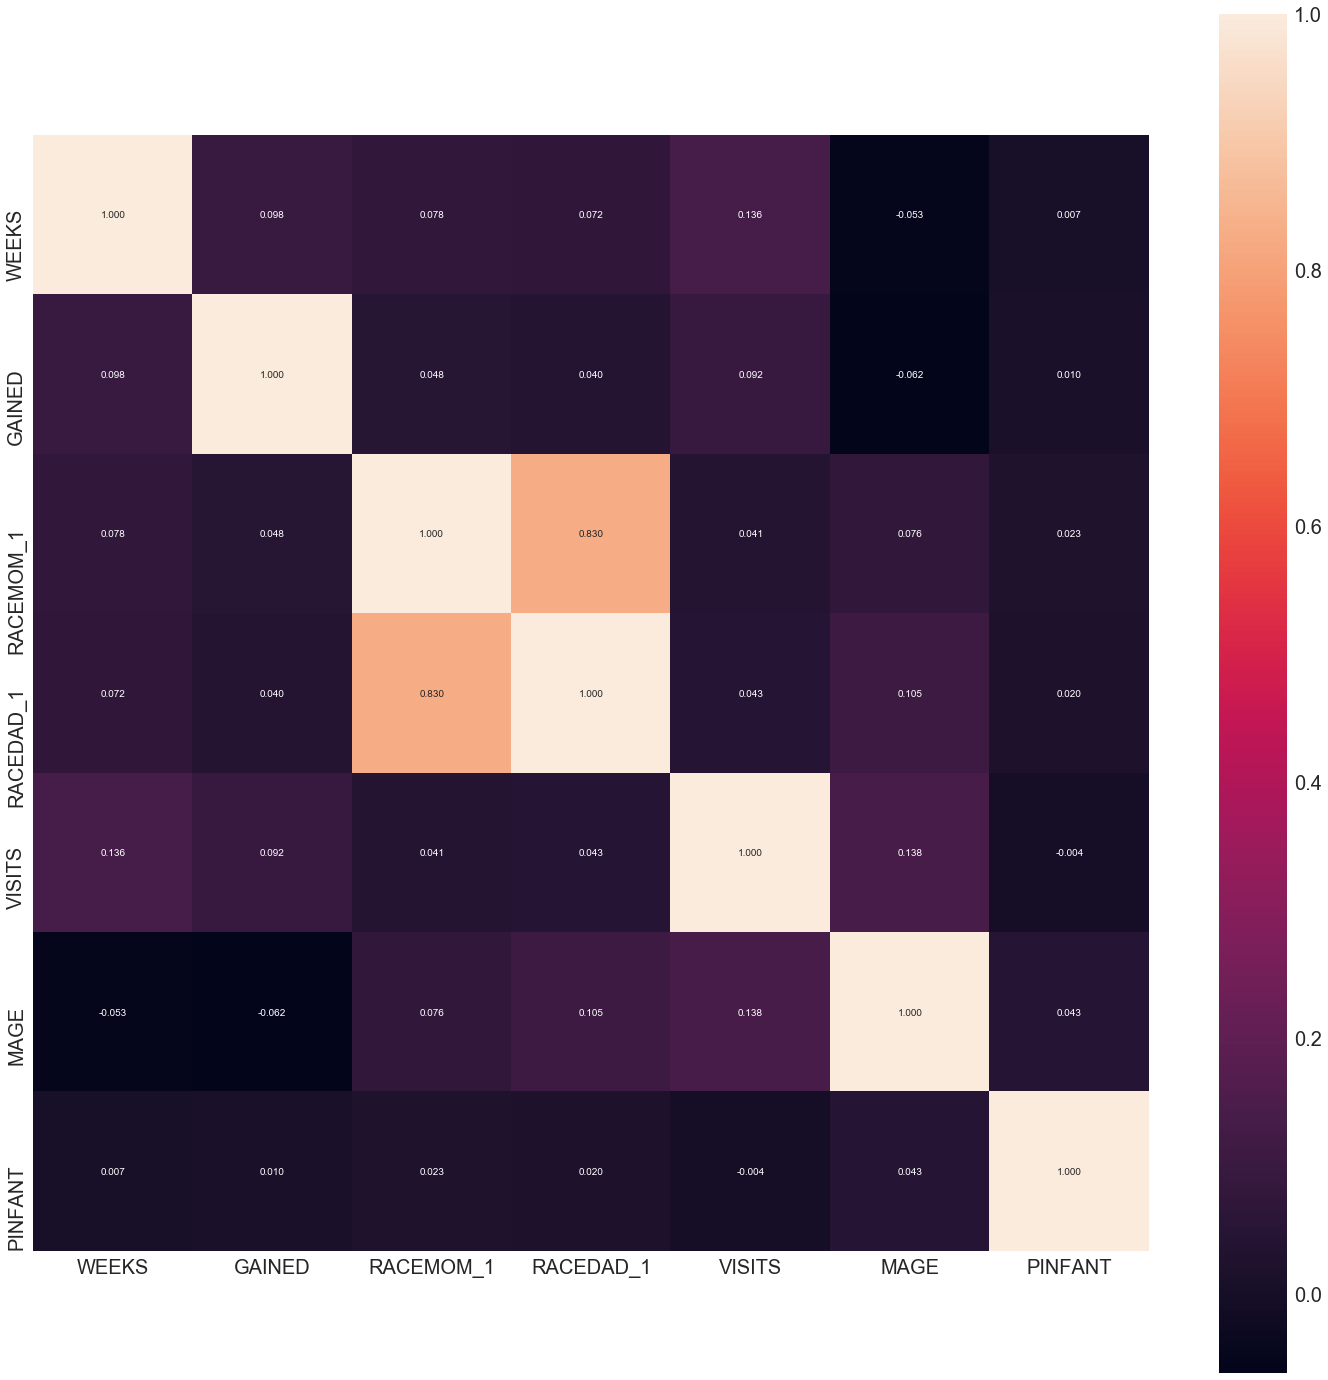

Plot for negative correlation 


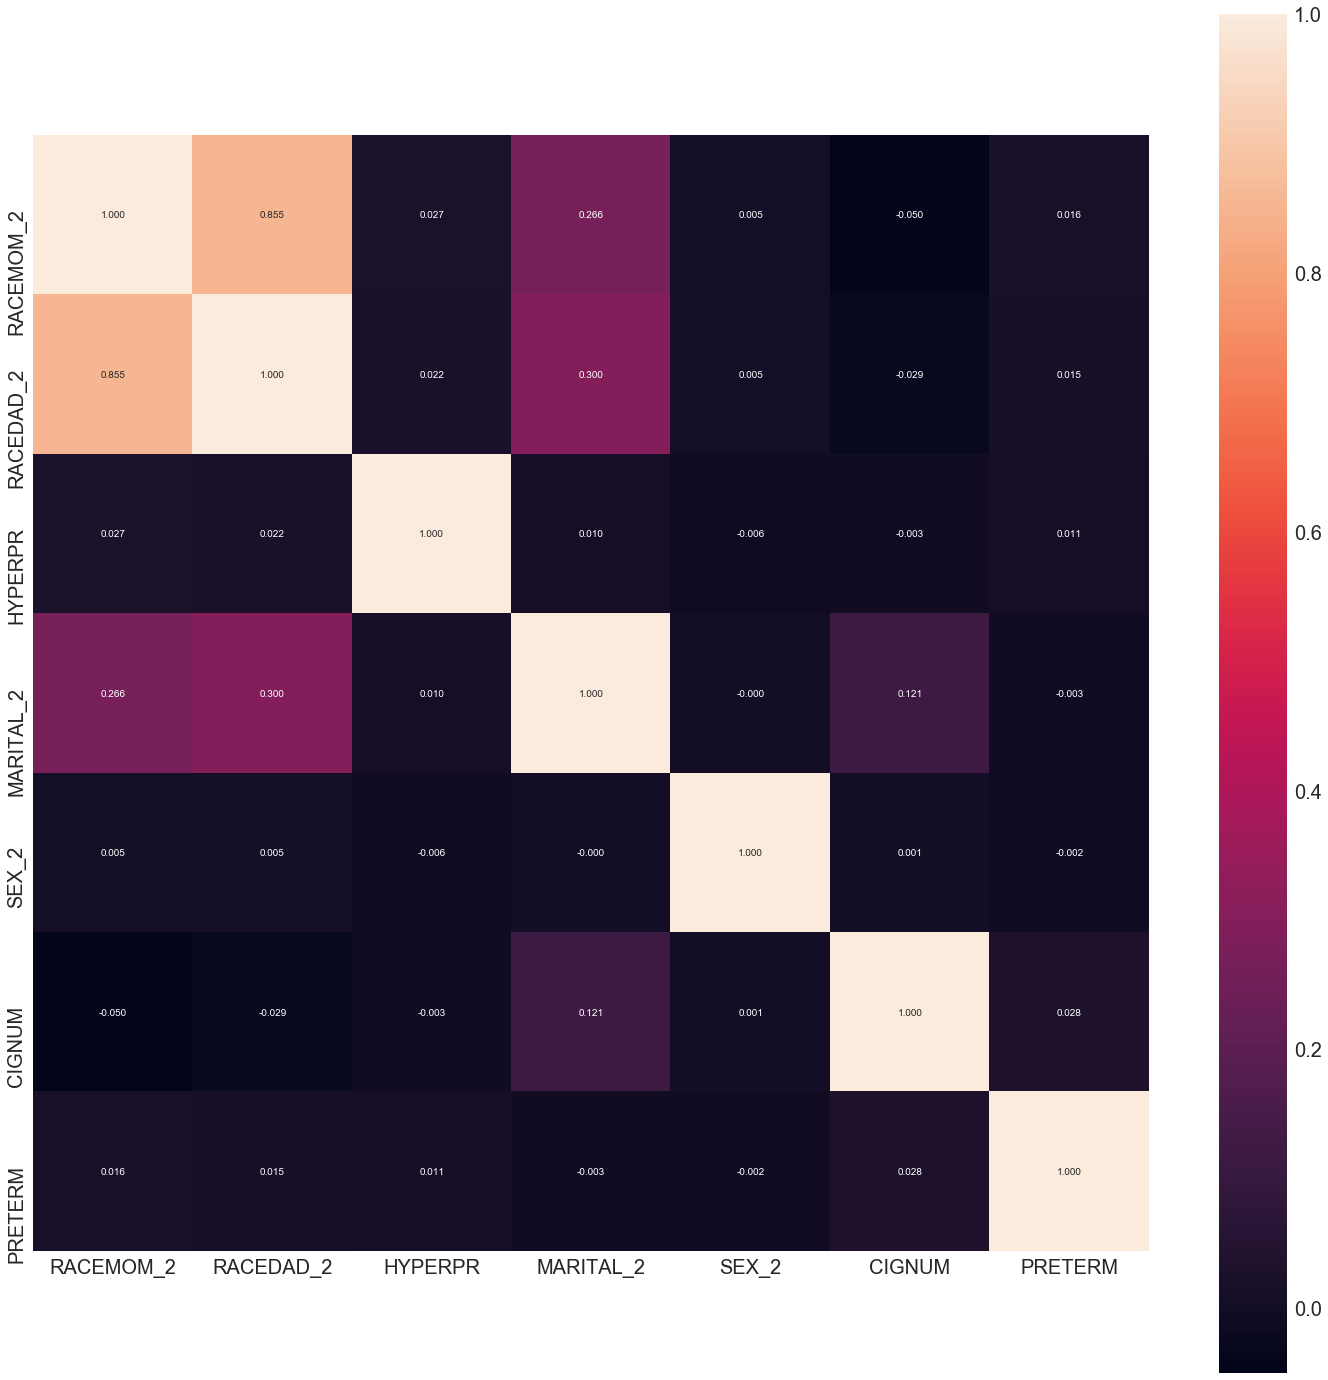

In [305]:
k = 7 #number of variables for heatmap
corrmat = inputData.corr()
cols = corrmat.nlargest(k + 1, 'BWEIGHT')['BWEIGHT'][1:]
sm_cols = corrmat.nsmallest(k, 'BWEIGHT')['BWEIGHT']
print(cols)
print(sm_cols)

cols= cols.index
sm_cols = sm_cols.index

f, ax = plt.subplots(figsize=(25, 25))
print("Plot for postive correlation \n ===========================")
cm = np.corrcoef(inputData[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

print("Plot for negative correlation \n ===========================")
f, ax = plt.subplots(figsize=(25, 25))
cm = np.corrcoef(inputData[sm_cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, 
                 yticklabels=sm_cols.values, xticklabels=sm_cols.values)
plt.show()

In [306]:
y_col = corrmat.nlargest(1, 'BWEIGHT')['BWEIGHT']
print(y_col.index)

Index(['BWEIGHT'], dtype='object')


In [307]:
inputData = inputData[cols.append(sm_cols).append(y_col.index)]
#inputData = inputData[cols.append(y_col.index)]
print(inputData.shape)

(101399, 15)


### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [308]:
total = inputData.isnull().sum().sort_values(ascending=False)
percent = (inputData.isnull().sum()/inputData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("There is no missing data problem in the given dataset");
print(missing_data.head(20))

There is no missing data problem in the given dataset
           Total  Percent
BWEIGHT        0      0.0
PRETERM        0      0.0
CIGNUM         0      0.0
SEX_2          0      0.0
MARITAL_2      0      0.0
HYPERPR        0      0.0
RACEDAD_2      0      0.0
RACEMOM_2      0      0.0
PINFANT        0      0.0
MAGE           0      0.0
VISITS         0      0.0
RACEDAD_1      0      0.0
RACEMOM_1      0      0.0
GAINED         0      0.0
WEEKS          0      0.0


### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [320]:
X = inputData[inputData.loc[:, inputData.columns != 'BWEIGHT'].columns]
y = inputData['BWEIGHT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(101399, 14) (101399,) (81119, 14) (20280, 14) (81119,) (20280,)


### TASK 9.2: On the training dataset, apply a normalization technique

In [321]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train, y_train);

### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [322]:
X_test = sc.fit_transform(X_test, y_test)

### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

Choosing batch gradient as the 'n' is large : 101400
And due to high computational complexity in case of other functions (stochastic and mini-batch)

In [323]:
 def cost_function(X, y, w):
    m = len(y)
    J = np.sum((X.dot(w) - y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, w, alpha, num_iters):
    cost_history = [0] * num_iters
    m = len(Y)
    
    for iteration in range(num_iters):
        y_pred = X.dot(w)
        
        # Difference b/w Hypothesis and Actual Y
        loss = y_pred - Y
        
        #adjust w
        w = w - alpha * (X.T.dot(loss) / m)
        
        # Cost  values update
        cost = cost_function(X, Y, w)
        cost_history[iteration] = cost
        
    return w, cost_history

In [324]:
#initializing the model
w = np.random.rand(14)
alpha = 0.0001
W, cost_history = gradient_descent(X_train, y_train, w, alpha, 1000)

# New Values of coeffiecnets
print(W)

# Final Cost of new B
print(cost_history[-1])

[0.62156501 0.26406347 0.87608304 0.58229735 0.40421822 0.27488754
 0.46690065 0.18853796 0.29757697 0.42382995 0.23906894 0.33991652
 0.72717003 0.06171129]
28.089459004340092


### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [326]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse


Y_pred = X_test.dot(W)
rmse(y_test, Y_pred)

7.482796805696532

In [ ]:
Y_test_pred = X_test.dot(W)

In [ ]:
rmse0 =rmse(y_test, Y_test_pred)
print(rmse0)

### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [255]:
w = np.random.rand(14)
W1, cost_history= gradient_descent(X_train, y_train, w, .0001, 100);
Y_test_pred = X_test.dot(W1)
rmse1 = rmse(y_test, Y_test_pred)
print(rmse1)

w = np.random.rand(14)
W2, cost_history= gradient_descent(X_train, y_train, w, .005, 1000);
Y_test_pred = X_test.dot(W2)
rmse2 = rmse(y_test, Y_test_pred)
print(rmse2)

#w = np.random.rand(14)
W3,cost_history = gradient_descent(X_train, y_train, w, .0001, 500);
Y_test_pred = X_test.dot(W3)
rmse3 = rmse(y_test, Y_test_pred)
print(rmse3)

#w = np.random.rand(14)
W4,cost_history = gradient_descent(X_train, y_train, w, 0.001, 10000);
Y_test_pred = X_test.dot(W4)
rmse4 = rmse(y_test, Y_test_pred)
print(rmse4)



7.510135665971286
7.326969084855983
7.5412412267082765
7.325509753154213


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [257]:
avgRMSE = (rmse0 + rmse1 + rmse2  + rmse3 + rmse4)/ 5
print(avgRMSE);

sdRMSE = np.std([rmse0 , rmse1 , rmse2 , rmse3 , rmse4])
print(sdRMSE);


7.4120829203888166
0.09393445302337397


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [277]:
X = np.vstack((X_train, X_test))
y = y_train.append(y_test)
X.shape, y.shape

W_whole, _ = gradient_descent(X, y, w, .005, 1000);


### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [274]:
x_judge = pd.read_csv("judge-without-label.csv")
x_judge.drop('ID', axis=1, inplace=True)
print(x_judge.shape)
indexNames = x_judge[ x_judge['SEX'] == 9 ].index
 
# Delete these row indexes from dataFrame
x_judge.drop(indexNames , inplace=True)
print(x_judge.shape)
x_judge = pd.get_dummies(x_judge, columns=['HISPMOM', 'HISPDAD', 'RACEDAD', 'RACEMOM', 'SEX', 'MARITAL'], prefix = ['HISPMOM', 'HISPDAD', 'RACEDAD', 'RACEMOM', 'SEX', 'MARITAL'])
x_judge.drop('RACEDAD_0', axis=1, inplace=True)
x_judge.drop('RACEMOM_0', axis=1, inplace=True)
x_judge.drop('SEX_1', axis=1, inplace=True)
x_judge.drop('MARITAL_1', axis=1, inplace=True)

print(x_judge.head())

x_judge = x_judge[cols.append(sm_cols)]
#inputData = inputData[cols.append(y_col.index)]
print(x_judge.shape)

x_judge = sc.transform(x_judge)

(2001, 35)
(2001, 35)
   FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  TOTALP  BDEAD  TERMS  LOUTCOME  \
0    30      70      11    26     14     16       4      0      3         9   
1    21      36      15    18      9     12       1      0      0         9   
2    22      18      10    25     12     12       5      0      3         2   
3    24      25      10    22     12     11       4      0      0         1   
4    24      38      15    26     12     12       1      0      0         9   

     ...      RACEMOM_1  RACEMOM_2  RACEMOM_3  RACEMOM_4  RACEMOM_5  \
0    ...              1          0          0          0          0   
1    ...              0          0          1          0          0   
2    ...              1          0          0          0          0   
3    ...              1          0          0          0          0   
4    ...              1          0          0          0          0   

   RACEMOM_6  RACEMOM_7  RACEMOM_8  SEX_2  MARITAL_2  
0          0         

### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [279]:
Y_judge_pred = x_judge.dot(W_whole)
Y_judge_pred

array([-0.04604037, -0.88563492, -0.79623861, ...,  0.19780737,
       -1.43662161, -1.1709462 ])

In [292]:
df = pd.DataFrame(columns=["ID", "BWEIGHT"]) # Note that there are now row data inserted.


ids = pd.read_csv("judge-without-label.csv")['ID']

df[0] = ids
df[1] = Y_judge_pred
df.to_csv("judge-submission-run-1.csv")


# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train);

X_test = sc.transform(X_test);

#initializing the model
w = np.random.rand(14)
alpha = 0.0001
W, cost_history = gradient_descent(X_train, y_train, w, alpha, 1000)

# New Values of coeffiecnets
print(W)

# Final Cost of new B
print(cost_history[-1])

Y_test_pred = X_test.dot(W)

rmse0 =rmse(y_test, Y_test_pred)
print(rmse0)

w = np.random.rand(14)
W1, cost_history= gradient_descent(X_train, y_train, w, .0001, 100);
Y_test_pred = X_test.dot(W1)
rmse1 = rmse(y_test, Y_test_pred)
print(rmse1)

w = np.random.rand(14)
W2, cost_history= gradient_descent(X_train, y_train, w, .005, 1000);
Y_test_pred = X_test.dot(W2)
rmse2 = rmse(y_test, Y_test_pred)
print(rmse2)

w = np.random.rand(14)
W3,cost_history = gradient_descent(X_train, y_train, w, .0001, 500);
Y_test_pred = X_test.dot(W3)
rmse3 = rmse(y_test, Y_test_pred)
print(rmse3)

w = np.random.rand(14)
W4,cost_history = gradient_descent(X_train, y_train, w, 0.001, 10000);
Y_test_pred = X_test.dot(W4)
rmse4 = rmse(y_test, Y_test_pred)
print(rmse4)

X = np.vstack((X_train, X_test))
y = y_train.append(y_test)
X.shape, y.shape

avgRMSE = (rmse0 + rmse1 + rmse2  + rmse3 + rmse4)/ 5
print(avgRMSE);

sdRMSE = np.std([rmse0 , rmse1 , rmse2 , rmse3 , rmse4])
print(sdRMSE);


W_whole, _ = gradient_descent(X, y, w, .005, 1000);



In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train);

X_test = sc.transform(X_test);

#initializing the model
w = np.random.rand(14)
alpha = 0.0001
W, cost_history = gradient_descent(X_train, y_train, w, alpha, 1000)

# New Values of coeffiecnets
print(W)

# Final Cost of new B
print(cost_history[-1])

Y_test_pred = X_test.dot(W)

rmse0 =rmse(y_test, Y_test_pred)
print(rmse0)

w = np.random.rand(14)
W1, cost_history= gradient_descent(X_train, y_train, w, .0001, 100);
Y_test_pred = X_test.dot(W1)
rmse1 = rmse(y_test, Y_test_pred)
print(rmse1)

w = np.random.rand(14)
W2, cost_history= gradient_descent(X_train, y_train, w, .005, 1000);
Y_test_pred = X_test.dot(W2)
rmse2 = rmse(y_test, Y_test_pred)
print(rmse2)

w = np.random.rand(14)
W3,cost_history = gradient_descent(X_train, y_train, w, .0001, 500);
Y_test_pred = X_test.dot(W3)
rmse3 = rmse(y_test, Y_test_pred)
print(rmse3)

w = np.random.rand(14)
W4,cost_history = gradient_descent(X_train, y_train, w, 0.001, 10000);
Y_test_pred = X_test.dot(W4)
rmse4 = rmse(y_test, Y_test_pred)
print(rmse4)

X = np.vstack((X_train, X_test))
y = y_train.append(y_test)
X.shape, y.shape

avgRMSE1 = (rmse0 + rmse1 + rmse2  + rmse3 + rmse4)/ 5
print(avgRMSE1);

sdRMSE1 = np.std([rmse0 , rmse1 , rmse2 , rmse3 , rmse4])
print(sdRMSE1);

(101399, 14) (101399,) (81119, 14) (20280, 14) (81119,) (20280,)
[0.7392577  0.48003382 0.82407164 0.32922373 0.28929066 0.35246654
 0.09238152 0.95042458 0.13690831 0.83527999 0.39967606 0.2667481
 0.48336877 0.6687414 ]
28.188979697703257
7.511147165301205
7.631399519850943
7.339743941835556
7.578120665108139
7.336425646963283
7.479367387811825
0.12149319417111143


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train);

X_test = sc.transform(X_test);

#initializing the model
w = np.random.rand(14)
alpha = 0.0001
W, cost_history = gradient_descent(X_train, y_train, w, alpha, 1000)

# New Values of coeffiecnets
print(W)

# Final Cost of new B
print(cost_history[-1])

Y_test_pred = X_test.dot(W)

rmse0 =rmse(y_test, Y_test_pred)
print(rmse0)

w = np.random.rand(14)
W1, cost_history= gradient_descent(X_train, y_train, w, .0001, 100);
Y_test_pred = X_test.dot(W1)
rmse1 = rmse(y_test, Y_test_pred)
print(rmse1)

w = np.random.rand(14)
W2, cost_history= gradient_descent(X_train, y_train, w, .005, 1000);
Y_test_pred = X_test.dot(W2)
rmse2 = rmse(y_test, Y_test_pred)
print(rmse2)

w = np.random.rand(14)
W3,cost_history = gradient_descent(X_train, y_train, w, .0001, 500);
Y_test_pred = X_test.dot(W3)
rmse3 = rmse(y_test, Y_test_pred)
print(rmse3)

w = np.random.rand(14)
W4,cost_history = gradient_descent(X_train, y_train, w, 0.001, 10000);
Y_test_pred = X_test.dot(W4)
rmse4 = rmse(y_test, Y_test_pred)
print(rmse4)

X = np.vstack((X_train, X_test))
y = y_train.append(y_test)
X.shape, y.shape

avgRMSE2 = (rmse0 + rmse1 + rmse2  + rmse3 + rmse4)/ 5
print(avgRMSE2);

sdRMSE2 = np.std([rmse0 , rmse1 , rmse2 , rmse3 , rmse4])
print(sdRMSE2);


(101399, 14) (101399,) (81119, 14) (20280, 14) (81119,) (20280,)
[0.39592197 0.33665037 0.88752044 0.6840752  0.77574589 0.26336364
 0.84227628 0.05869957 0.7483443  0.49341309 0.81170627 0.31819869
 0.63859697 0.23012167]
28.674660979483352
7.566963541139355
7.524524852547539
7.332207769987582
7.481492787421495
7.33185789688863
7.447409369596921
0.09800533496918896


In [286]:
print("ultimate avg RSME", + (avgRMSE1+avgRMSE2+avgRMSE)/3 )
print("ultimate sd RSME", + ((sdRMSE1+sdRMSE2+sdRMSE)/3)) 

ultimate avg RSME 7.446286559265854
ultimate sd RSME 0.10447766072122477


### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).

In [295]:

print("Kaggle user name is jahnavisri") 
print("Kaggle rmse ----> 7.40737")





Kaggle user name is jahnavisri
Kaggle rmse ----> 7.40737
